# Quanto vale meu terreno?

<br>

Apesar das instabilidades no mercado financeiro internacional, o setor de energias renováveis continua crescendo de vento em poupa.
Querendo aproveitar o momento, um empresário de Juazeiro do Norte planeja implantar uma usina de geração de energia solar na região.
Ele está muito interessado em um terreno localizado na divisa da cidade com Barbalha.

O proprietário do terreno estabeleceu o valor de R\$ 200,00 (duzentos reais) por metro quadrado.
Como o proprietário não sabia informar a área total de seu terreno com precisão, o empresário contratou uma empresa chamada *MedeBem*, que realiza serviços de topografia.
No entanto, eles não estão entrando em acordo quanto ao resultado apresentado pela MedeBem.
O proprietário alega que a área do terreno é bem maior do que aquela calculada pela empresa.

Para resolver esta questão, o proprietário contratou você para analisar as medições feitas pela MedeBem e, com isso, determinar se há alguma inconsistência no cálculo do custo final de seu terreno.

## Dados brutos

O levantamento planimétrico da MedeBem analisou os $9$ pontos listados abaixo.
Segundo a empresa, eles utilizaram uma estação total de última geração, com altíssima precisão.

In [1]:
import numpy as np

# Abcissas
x = [np.float64(7.3000000000000194),
     np.float64(24.000000000000068),
     np.float64(24.00000000000005),
     np.float64(0.50000000000001621),
     np.float64(8.0),
     np.float64(4.0),
     np.float64(15.0),
     np.float64(26.0),
     np.float64(19.0)]

# Ordenadas
y = [np.float64(7.3000000000000167),
     np.float64(24.000000000000071),
     np.float64(24.000000000000053),
     np.float64(0.50000000000001243),
     np.float64(4.0),
     np.float64(9.0),
     np.float64(27.0),
     np.float64(25.0),
     np.float64(11.0)]

Você então decide visualizar os pontos recebidos para tentar detectar algum problema grosseiro.

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots() # cria uma figura e com um único sistema de eixos
ax.set_aspect('equal') # fixa a razão de aspecto do gráfico
plt.close() # evita que o gráfico seja exibido antes de desenhado

def desenha_pontos(x, y, ax):
    """
    Esta função desenha pontos no plano.
    
    Parâmetros
    ----------
        x : list
            Abcissas dos pontos
        y : list
            Ordenadas dos pontos
        ax : matplotlib.axes
            Eixos usados para plotar os pontos (x[i],y[i])

    Retorno
    -------
        Não possui valor de retorno. Apenas plota o gráfico nos eixos fornecidos.
    """
    
    # Seu código inicia aqui.
    # Dica: utilize a função ax.scatter (https://matplotlib.org/3.1.1/gallery/shapes_and_collections/scatter.html)
    ax.scatter(x, y, s=30)
    for i in range(len(x)):
        a = x[i]; b = y[i]
        label = '{:d}'.format(i)
        ax.annotate(label, # this is the text
                    (a,b), # this is the point to label
                    textcoords='offset points', # how to position the text
                    xytext=(7,(-1*(i%2))*10), # distance from text to points (x,y)
                    ha='center') # horizontal alignment can be left, right or center

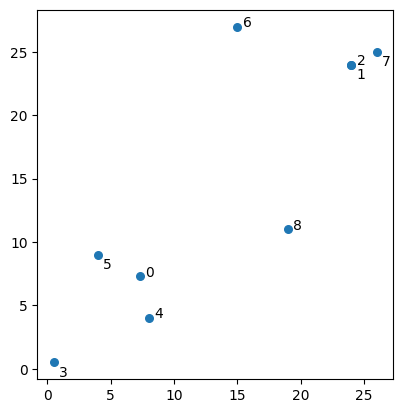

In [3]:
desenha_pontos(x,y,ax)
fig

**Pergunta**. Com base no gráfico acima, é possível deduzir algo sobre as medições?

_Digite sua resposta aqui_

## Limites do terreno

Após a análise dos pontos, você passou para a avaliação dos limites do terreno.
A MedeBem lhe informou que determinou os limites do terreno usando um algoritmo para o cálculo do [fecho convexo](https://pt.wikipedia.org/wiki/Envolt%C3%B3ria_convexa) de um conjunto de pontos.
Podemos "enxergar" o fecho convexo do seguinte modo.
Imagine que cada ponto está associado a um alfinete fixado em um mural.
Ao colocarmos uma liga envolvendo todos os alfinetes, se formará uma região convexa, a qual denominamos fecho convexo.

A MedeBem lhe forneceu a implementação que eles utilizaram (abaixo).

In [4]:
def orientacao(p,q,r):
    """
    Esta função verifica a orientação de três pontos: horária, anti-horária, colineares
    
    Parâmetros
    ----------
        p,q,r : tuples
            Pontos usados no cálculo.

    Retorno
    -------
        -1 : indica sentido horário
         0 : indica colineares
         1 : indica sentido anti-horário
    """
    return np.sign((q[0]-p[0])*(r[1]-p[1]) - (q[1]-p[1])*(r[0]-p[0]))

def ccw(i,n):
    return 0 if i == (n-1) else i+1

def cw(i,n):
    return (n-1) if i == 0 else i-1

# Seleciona três pontos não colineares de S
def calcula_limites_inicial(x,y,S):
    # Selecionamos os dois primeiros pontos de S
    p = S[0]; q = S[1];
    P = [p,q] # índices dos pontos selecionados
    
    # Buscamos o terceiro ponto tal que o triângulo
    # está ordenado segundo a regra da mão direita
    for i in S[2:]:
        r = S[i]
        if orientacao((x[p],y[p]),(x[q],y[q]),(x[r],y[r])) > 0:
            P.append(r)
            break

    # Verificamos se realmente selecionamos 3 pontos
    assert len(P) == 3
    
    return P

def calcula_limites(x,y):
    """
    Esta função determina os pontos extremos (limites) de um terreno.
    
    Parâmetros
    ----------
        x : list
            Abcissas dos pontos
        y : list
            Ordenadas dos pontos

    Retorno
    -------
        P : list
            Lista contendo os índices dos pontos limites do terreno, ordenados em sentido anti-horário.
            As coordenadas x e y do i-ésimo ponto limite são acessadas fazendo: x[P[i]] e y[P[i]]
    """
    S = list(range(len(x)))
    P = calcula_limites_inicial(x,y,S)
    # Removemos os pontos selecionados de S
    S.remove(P[0]); S.remove(P[1]); S.remove(P[2]);

    for r in S:
        # calcula uma aresta visível (P[i],P[i+1]) de P
        a = None
        n = len(P)
        for i in range(n):
            p = P[i]
            q = P[ccw(i,n)]
            if orientacao((x[p],y[p]),(x[q],y[q]),(x[r],y[r])) < 0:
                a = i
                break
                
        if a == None: # não há aresta visível por r
            continue
        
        # Calculamos a sequência de arestas fracamente visíveis por r
        # Primeiro, adicionamos a aresta visível encontrada anteriormente
        V = [P[a], P[ccw(a,n)]]
    
        # Depois, percorremos P no sentido anti-horário, partindo do vértice (a+1)%n
        p = ccw(a,n)
        q = ccw(p,n)
        while orientacao((x[P[p]],y[P[p]]),(x[P[q]],y[P[q]]),(x[r],y[r])) <= 0:
            V.append(P[q])
            p = q
            q = ccw(q,n)
            
        # Depois, percorremos no sentido horário, partindo de a
        p = cw(a,n)
        q = a
        while orientacao((x[P[p]],y[P[p]]),(x[P[q]],y[P[q]]),(x[r],y[r])) <= 0:
            V.insert(0,P[p])
            q = p
            p = cw(p,n)

        # Substituimos a sublista encontrada
        i = P.index(V[1])
        P.insert(i,r)
        for i in V[1:-1]:
            P.remove(i)
    
    return P

Segundo os desenvolvedores, o resultado do código acima deve ser uma lista com os pontos que delimitam o terreno, ordenados no sentido anti-horário.
Você decide desenhar os limites calculados para verificar se está tudo correto.

In [5]:
def desenha_terreno(x, y, P, ax):
    """
    Esta função desenha os limites de um terreno.
    
    Parâmetros
    ----------
        x : list
            Abcissas dos pontos
        y : list
            Ordenadas dos pontos
        P : list
            Índices dos pontos extremos do terreno,
            ordenados no sentido anti-horário
        ax : matplotlib.axes
            Eixos usados para plotar os pontos (x[P[i]],y[P[i]])

    Retorno
    -------
        Não possui valor de retorno. Apenas plota o gráfico nos eixos fornecidos.
    """
    
    # Seu código inicia aqui.
    # Dica: utilize a função ax.fill (https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/fill.html)
    u = []
    v = []
    for i in range(len(P)):
        u.append(x[P[i]])
        v.append(y[P[i]])
    ax.fill(u,v)

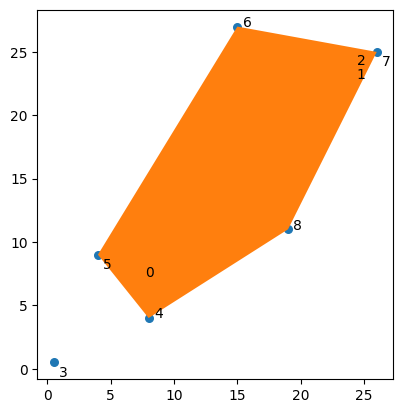

In [6]:
P_MedeBem = calcula_limites(x,y)
desenha_terreno(x, y, P_MedeBem, ax)
fig

**Pergunta**. Há algum problema com os limites do terreno? O que você acha que aconteceu?

_Digite sua resposta aqui_

## O poder do networking

Conversando com um colega experiente em levantamentos planimétricos desse tipo, ele comentou que já havia estudado o método da MedeBem antes e lhe sugere dar uma olhada no material a seguir:
- https://www.ime.usp.br/~cris/aulas/09_2_331/slides/rafael.pdf

Seu colega disse que o problema todo está na função `orientacao`, que verifica se uma sequência de três pontos está ordenada segundo a regra da mão esquerda, da mão direita, ou se são colineares.
Como a MedeBem implementou a `orientacao` usando somente aritmética de ponto flutuante, isto poderia levar a grandes erros de arredondamento.

**Pergunta**.
Revise os pontos disponibilizados pela MedeBem, para ver se surge alguma outra pista. Você vê algum "perigo" em potencial neles?

_Digite sua resposta aqui_

Seu colega disse que uma solução bastante simples seria aplicar _pequenas perturbações_ nas coordenadas dos pontos, antes de calcular os limites do terreno.
Ele sugere usar uma fórmula que leu em um [artigo](https://people.eecs.berkeley.edu/~jfc/papers/91/ECfocs91.pdf).
Dado um ponto $(x_i,y_i)$, o novo ponto considerado será:

$$
(x_i + \epsilon^{2^{2i}},  y_i + \epsilon^{2^{2i - 1}})\text{,}
$$

onde $\epsilon$ pode ser tomado igual à metade da precisão de máquina do `np.float64`, isto é, $\epsilon = 2^{-53}$.

Então, você implementa o método de perturbação sugerido

In [7]:
def perturba(x,y):
    """
    Esta função aplica uma pequena perturbação nas coordenadas dos pontos fornecidos.
    
    Parâmetros
    ----------
        x : list
            Abcissas dos pontos
        y : list
            Ordenadas dos pontos

    Retorno
    -------
        Não possui valor de retorno. Ela altera os próprios pontos fornecidos.
        Portanto, se precisar dos valores originais, é necessário fazer uma cópia deles
        antes de passá-los para esta função.
    """
    
    # Seu código inicia aqui.
    eps = np.float64(2.0)**(-53)
    for i in range(len(x)):
        x[i] = x[i] + eps**(2**(2*i))
        y[i] = y[i] + eps**(2**(2*i - 1))

e avalia seu resultado:

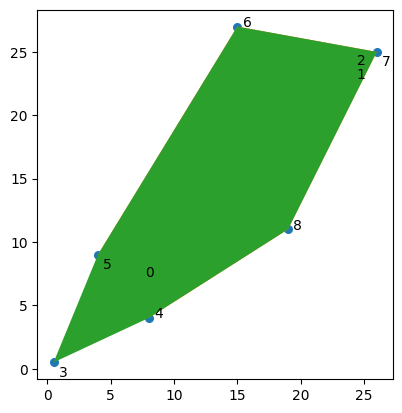

In [8]:
perturba(x,y)
P_Corrigido = calcula_limites(x,y)
desenha_terreno(x, y, P_Corrigido, ax)
fig

**Pergunta**. O que você diria agora sobre o cálculo dos limites do terreno da MedeBem?

_Digite sua resposta aqui_

## Área do terreno

Com os limites do terreno corrigidos, você parte para implementar um método para calcular a área do terreno usando um método bastante conhecido dos topógrafos, o método de Gauss.
Depois de assistir ao vídeo

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo(id='TIsullzRmBc',width=600)

você implementa o método de Gauss na função a seguir.

In [ ]:
def area_terreno(x,y,P):
    """
    Esta função calcula a área de um terreno usando o método de Gauss.
    
    Parâmetros
    ----------
        x : list
            Abcissas dos pontos
        y : list
            Ordenadas dos pontos
        P : list
            Índices dos pontos extremos do terreno,
            ordenados no sentido anti-horário

    Retorno
    -------
        area : np.float64
            A área do terreno representado por P.
    """
    
    # Seu código inicia aqui.
    return None # altere/remove caso necessário

## Custo final

Por fim, você elaborou uma função para calcular o custo final do terreno, utilizando a função `area_terreno` escrita anteriormente.

In [ ]:
def custo_terreno(x,y,P,m):
    """
    Esta função calcula o custo de um terreno em função de sua área e custo do metro quadrado.
    
    Parâmetros
    ----------
        x : list
            Abcissas dos pontos
        y : list
            Ordenadas dos pontos
        P : list
            Índices dos pontos extremos do terreno,
            ordenados no sentido anti-horário
        m : np.float64
            Valor do metro quadrado em reais (R$/m²).

    Retorno
    -------
        custo : np.float64
            Custo do terreno.
    """
    # Seu código inicia aqui.
    return 0.0 # altere/remove caso necessário

E avaliou os possíveis custos do terreno:

In [ ]:
C_MedeBem = custo_terreno(x,y,P_MedeBem,200)
print("Custo segundo a MedeBem: %f" % (C_MedeBem))

In [ ]:
C_Corrigido = custo_terreno(x,y,P_Corrigido,200)
print("Custo Corrigido: %f" % (C_Corrigido))

## Parecer final

Escreva aqui um parecer final sobre o levantamento planimétrico da MedeBem.
Você deverá apresentar em seu parecer uma discussão sobre (i) os limites do terreno, (ii) a área do terreno e (iii) o custo real do terreno, considerando o valor de R\$ 200,00/m² e indicando o possível prejuízo que seu cliente teria.

## Saiba mais

- O problema abordado nesta aula é baseado no artigo de [Kettner et al., Classroom examples of robustness problems in geometric computations, Computational Geometry, Volume 40, Issue 1, May 2008, Pages 61-78](https://doi.org/10.1016/j.comgeo.2007.06.003)

- A sugestão da perturbação nos pontos pode ser encontrada na Seção 3 do artigo de [Emiris e Canny, A General Approach to Removing Degeneracies, SIAM Journal on Computing, Volume 24 Issue 3, June 1995, Pages 650 - 664](https://doi.org/10.1137/S0097539792235918)

- Mais informações sobre a Matplotlib, podem ser obtidas aqui: https://matplotlib.org/

<br>
<p>&copy; 2019 Vicente Helano<br>
UFCA | Centro de Ciências e Tecnologia</p>